In [1]:
import pandas
import src.extraction as extract
import src.cleaning as clean
import seaborn as sbn

In [2]:
#importing dataset
df = extract.get_dataframe("goodreads_books")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52199 non-null  int64  
 1   title                   52199 non-null  object 
 2   link                    52199 non-null  object 
 3   series                  23319 non-null  object 
 4   cover_link              51592 non-null  object 
 5   author                  52199 non-null  object 
 6   author_link             52199 non-null  object 
 7   rating_count            52199 non-null  int64  
 8   review_count            52199 non-null  int64  
 9   average_rating          52199 non-null  float64
 10  five_star_ratings       52199 non-null  int64  
 11  four_star_ratings       52199 non-null  int64  
 12  three_star_ratings      52199 non-null  int64  
 13  two_star_ratings        52199 non-null  int64  
 14  one_star_ratings        52199 non-null

In [4]:
df_clean = clean.basic_clean(df)


In [5]:
df_clean.title.value_counts()

title
Broken                                                         14
Legacy                                                         14
Selected Poems                                                 13
Twisted                                                        11
Haunted                                                        10
                                                               ..
Bad Hair Day                                                    1
The First American: The Life and Times of Benjamin Franklin     1
Wild Swan                                                       1
Dark Lycan                                                      1
Going Rogue: An American Life                                   1
Name: count, Length: 48033, dtype: int64

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50600 entries, 0 to 52198
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               50600 non-null  object 
 1   series              50600 non-null  bool   
 2   author              50600 non-null  object 
 3   rating_count        50600 non-null  int64  
 4   review_count        50600 non-null  int64  
 5   average_rating      50600 non-null  float64
 6   five_star_ratings   50600 non-null  int64  
 7   four_star_ratings   50600 non-null  int64  
 8   three_star_ratings  50600 non-null  int64  
 9   two_star_ratings    50600 non-null  int64  
 10  one_star_ratings    50600 non-null  int64  
 11  number_of_pages     48378 non-null  float64
 12  awards              50600 non-null  int64  
 13  recommended_books   46720 non-null  object 
 14  books_in_series     21826 non-null  object 
 15  year_published      50600 non-null  int32  
 16  subgenre 

In [7]:
clean.save_dataframe(df_clean,"books_clean")

In [8]:
df = extract.get_dataframe("books_clean")

In [9]:
df_model = clean.prep_model(df)


In [10]:
df_model.head()


,series,average_rating,number_of_pages,awards,year_published,subgenre,compound_score,coleman_liau_index,rating_count_stand
0,True,4.03,220.0,0,2007,3,0.4678,6.91,-0.099855
1,True,4.35,400.0,0,2006,0,0.0000,11.53,-0.129085
2,True,4.23,320.0,0,2009,0,0.9455,8.07,-0.111049
3,True,4.01,464.0,0,1997,4,0.0000,0.00,0.163420
5,False,4.05,252.0,0,1966,2,-0.6156,9.58,-0.083255


<Axes: >

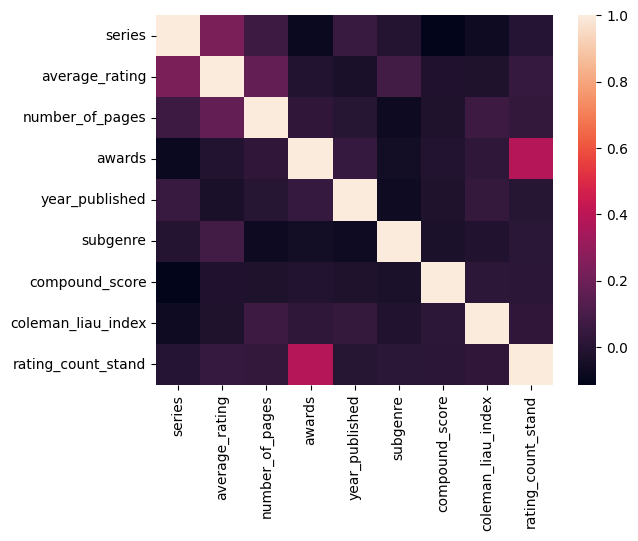

In [11]:
correlation_heatmap = sbn.heatmap(data=df_model.corr())
correlation_heatmap.savefig()

<Axes: xlabel='coleman_liau_index', ylabel='Count'>

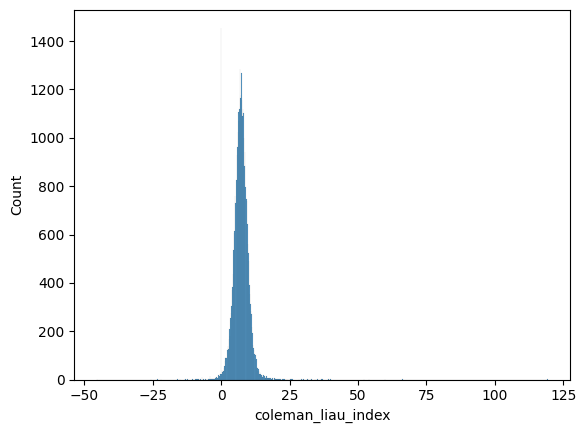

In [12]:
sbn.histplot(x=df_model.coleman_liau_index)

In [13]:
clean.save_dataframe(df_model,"model_prep")